In [1]:
import os
import numpy as np
import pandas as pd
import selfies as sf
import matplotlib.pyplot as plt
import seaborn as sns
from textdistance import levenshtein
from tqdm import tqdm

In [2]:
output_dir = 'outputs_2_levenshtein_distance_analysis'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [3]:
## baseline
filepath_base = os.path.join('baseline', 'GA+D.txt')
generated_base = pd.read_csv(filepath_base, header=None).iloc[:,0].values.tolist()
print(len(generated_base))

5000


In [4]:
## frag-level
filepath_frag = os.path.join('outputs_1_generate_molecules+frag', 'smi_after.csv')
generated_frag = pd.read_csv(filepath_frag, header=None).iloc[:,0].values.tolist()
print(len(generated_frag))

5000


In [6]:
reconstructed_base = [sf.encoder(sf.decoder(x)) for x in generated_base]
reconstructed_frag = [sf.encoder(sf.decoder(x)) for x in generated_frag]

In [7]:
base_gen = [list(sf.split_selfies(x)) for x in generated_base]
frag_gen = [list(sf.split_selfies(x)) for x in generated_frag]

In [8]:
base_rec = [list(sf.split_selfies(x)) for x in reconstructed_base]
frag_rec = [list(sf.split_selfies(x)) for x in reconstructed_frag]

In [9]:
base_sim = [levenshtein.normalized_similarity(x, y) for x, y in zip(base_gen, base_rec)]
frag_sim = [levenshtein.normalized_similarity(x, y) for x, y in zip(frag_gen, frag_rec)]

In [10]:
base_dist = [levenshtein.normalized_distance(x, y) for x, y in zip(base_gen, base_rec)]
frag_dist = [levenshtein.normalized_distance(x, y) for x, y in zip(frag_gen, frag_rec)]

In [11]:
data = pd.DataFrame({
    'Normalized Levenshtein Distance':frag_dist + base_dist,
    'Degree of Collapse':([f'ReBADD-SE (frag): {np.mean(frag_dist):.2f}'] * len(frag_dist))
                       + ([f'GA+D: {np.mean(base_dist):.2f}'] * len(base_dist))
})

In [12]:
sns.set_theme(style='darkgrid')

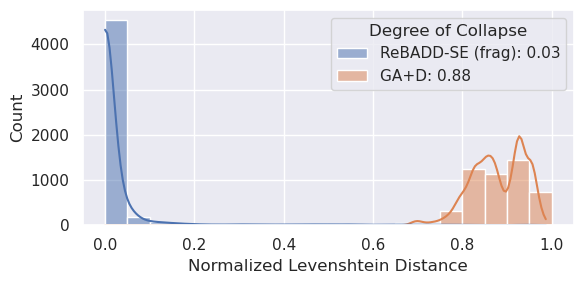

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6, 3))

_ = sns.histplot(data=data, x='Normalized Levenshtein Distance', binwidth=0.05, hue='Degree of Collapse',
                 kde=True, common_norm=False, ax=ax)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'selfies_collapse_analysis.png'), dpi=600)